# Graduate Admissions

### Abstract:

This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university. We are going to focus on accuracy of the predicted models for this dataset.

### Dataset Information:

This dataset is created for prediction of Graduate Admissions from an Indian perspective. The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are : 1. GRE Scores ( out of 340 ) 2. TOEFL Scores ( out of 120 ) 3. University Rating ( out of 5 ) 4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 5. Undergraduate GPA ( out of 10 ) 6. Research Experience ( either 0 or 1 ) 7. Chance of Admit ( ranging from 0 to 1 )


#### Independent Variables :
GRE Score
Toefl Score
University Rating
SOP
LOR
CGPA
Research

#### Outcome Variable:
Chance of Admit

### Data Source:

https://www.kaggle.com/mohansacharya/graduate-admissions

### Importing the required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as skm
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score, roc_auc_score, confusion_matrix

### Data Exploration:

In [2]:
grad_admissions = pd.read_csv('Admission_Predict.csv')

In [3]:
grad_admissions.shape

(400, 9)

In [4]:
grad_admissions=grad_admissions.replace([np.inf, -np.inf], np.nan)

In [5]:
result = grad_admissions.isnull().sum()
print(result)

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [6]:
grad_admissions = grad_admissions.dropna()

In [7]:
grad_admissions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 31.2 KB


In [8]:
grad_admissions = grad_admissions.drop('Serial No.',axis=1)

In [9]:
grad_admissions.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
grad_admissions.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [11]:
grad_admissions.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [12]:
grad_admissions.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [13]:
#Renaming the columns to make them consistent throughout

grad_admissions = grad_admissions.rename(columns = {"GRE Score" : "GRE_SCORE", "TOEFL Score":"TOEFL_SCORE","University Rating":"UNIV_RATING"
                                  ,"Research":"RESEARCH","Chance of Admit ":"CHANCE_OF_ADMIT","LOR ":"LOR"})

In [14]:
duplicate_rows = grad_admissions[grad_admissions.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicate_rows)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [GRE_SCORE, TOEFL_SCORE, UNIV_RATING, SOP, LOR, CGPA, RESEARCH, CHANCE_OF_ADMIT]
Index: []


Text(0.5, 1, 'Heatmap for highest correlated features in Graduate Admissions data')

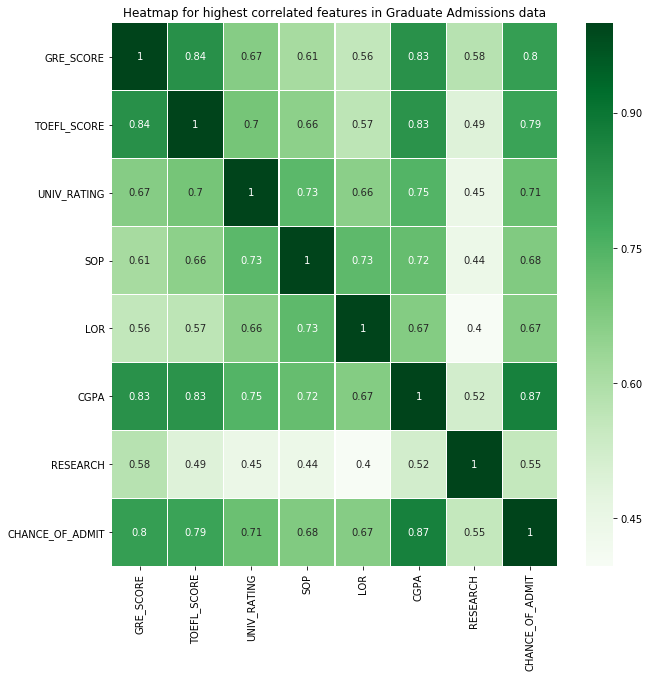

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(grad_admissions.corr(), cmap="Greens",annot=True, linewidths=.5)
plt.title("Heatmap for highest correlated features in Graduate Admissions data")

From the above correlation graph, we can see that the variables are not highly correlated to each other. But a very interesting aspect of it is that, that Research and Chance are not highly correlated. This may imply that having a Research experience doesn't have much effect on getting an admit. i.e. to say that even if we delete Research variable from our dataset, it will have minimal affect on the Chance of Admit variable.
Let's explore more on the variables.

### Exploring Variables

In [16]:
print('Number of Research applicants - ',sum(grad_admissions.RESEARCH==1))

print('Percentage of the Research applicants from the Total',sum(grad_admissions.RESEARCH==1)/grad_admissions.RESEARCH.count())

Number of Research applicants -  219
Percentage of the Research applicants from the Total 0.5475


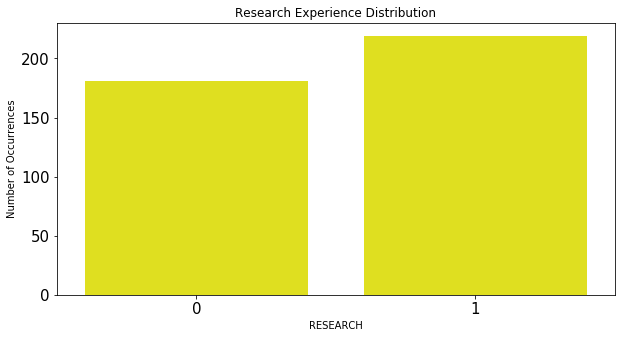

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x='RESEARCH', data = grad_admissions, color = 'yellow')
ax.set_xlabel('RESEARCH')
ax.set_ylabel('Number of Occurrences')
ax.set_title('Research Experience Distribution')
ax.tick_params(labelsize=15)

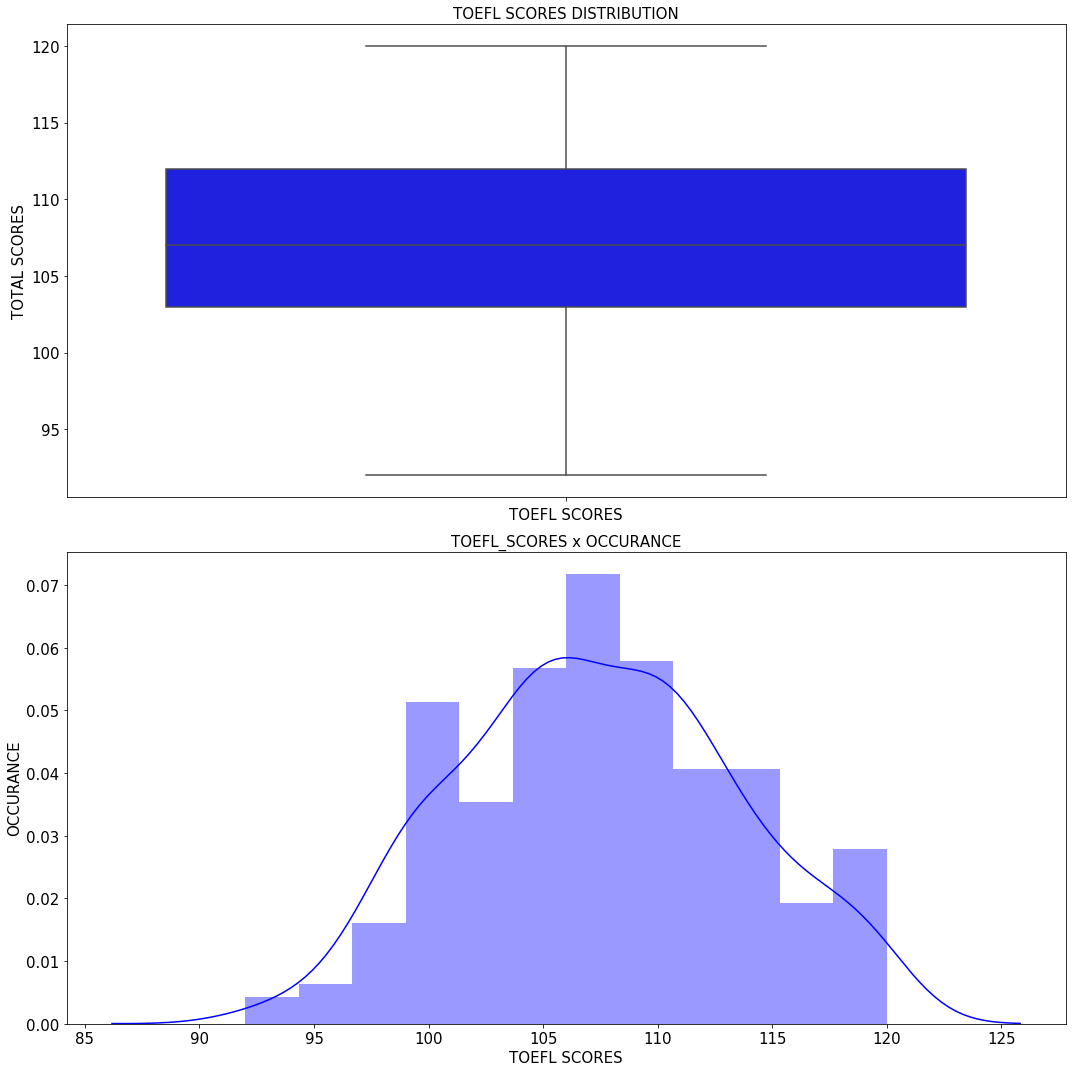

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 15))
sns.boxplot(x = 'TOEFL_SCORE', data = grad_admissions, orient = 'v', ax = ax1, color = 'blue')
ax1.set_xlabel('TOEFL SCORES', fontsize=15)
ax1.set_ylabel('TOTAL SCORES', fontsize=15)
ax1.set_title('TOEFL SCORES DISTRIBUTION', fontsize=15)
ax1.tick_params(labelsize=15) 

sns.distplot(grad_admissions['TOEFL_SCORE'], ax = ax2, color = 'blue')
ax2.set_xlabel('TOEFL SCORES', fontsize=15)
ax2.set_ylabel('OCCURANCE', fontsize=15)
ax2.set_title('TOEFL_SCORES x OCCURANCE', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

As we can see in the above graphs that, majority of the people fall under range of 104 to 113 Toefl scores

In [19]:
print('Minimum TOEFL score -',min(grad_admissions.TOEFL_SCORE))
print('Maximum TOEFL score -',max(grad_admissions.TOEFL_SCORE))

Minimum TOEFL score - 92
Maximum TOEFL score - 120


Similarly we can visualize for the other variables like CGPA and GRE Scores, since they had highest correlation with Chance of Admit ariable

In [20]:
print('Minimum CGPA -',min(grad_admissions.CGPA))
print('Maximum CGPA -',max(grad_admissions.CGPA))

print('Minimum GRE score -',min(grad_admissions.GRE_SCORE))
print('Maximum GRE score -',max(grad_admissions.GRE_SCORE))

Minimum CGPA - 6.8
Maximum CGPA - 9.92
Minimum GRE score - 290
Maximum GRE score - 340


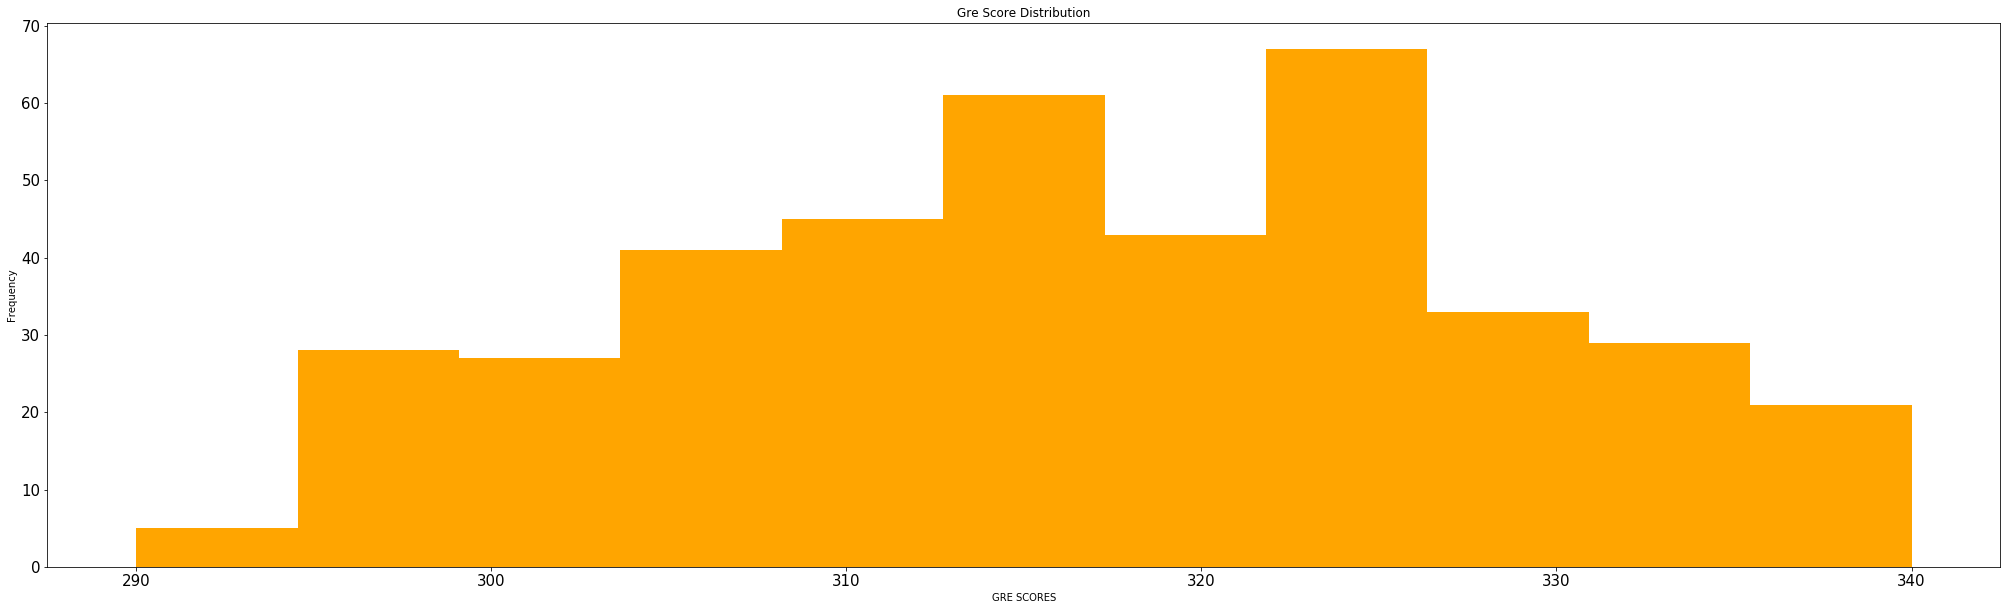

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(35, 10)
plt.hist(grad_admissions.GRE_SCORE,bins = 'auto',color ='orange')
ax.set_xlabel('GRE SCORES')
ax.set_ylabel('Frequency')
ax.set_title('Gre Score Distribution')
ax.tick_params(labelsize=15)

We can see that the range between 310 to 330 is densely populated. So, we can go ahead and assume that any score above 310 increases the chances of admit

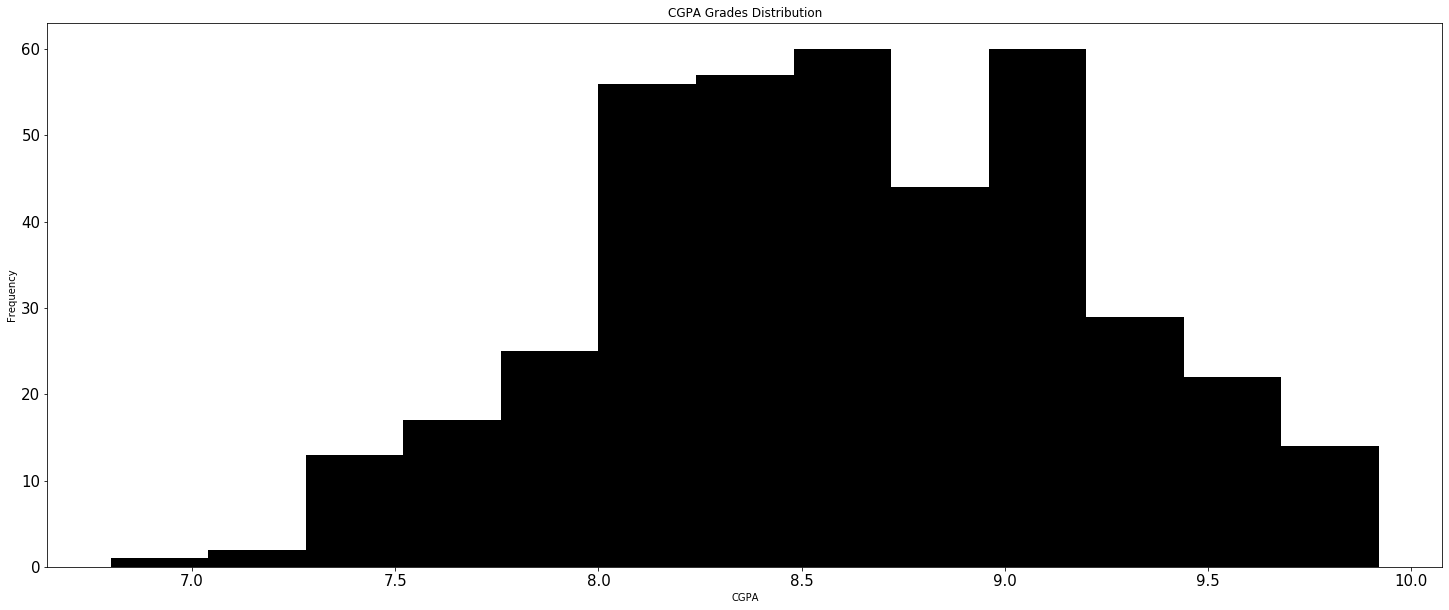

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
plt.hist(grad_admissions.CGPA,bins = 'auto',color ='black')
ax.set_xlabel('CGPA')
ax.set_ylabel('Frequency')
ax.set_title('CGPA Grades Distribution')
ax.tick_params(labelsize=15)

Similarly, anything above 8.0 CGPA will increase the chances of admit. Also, from the previous correlation chart, we can see that GRE and CGPA are 80% correlated. This may imply that if a student has highest CGPA, he may have high GRE score

We can plot CGPA/GRE score against UNIVERSITY_RATINGS in order to understand the significance of graduating from a good university against CGPA/GRE score

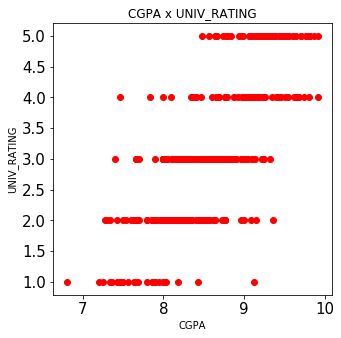

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
plt.scatter(grad_admissions.CGPA,grad_admissions.UNIV_RATING,color='red')
ax.set_xlabel('CGPA')
ax.set_ylabel('UNIV_RATING')
ax.set_title('CGPA x UNIV_RATING')
ax.tick_params(labelsize=15)

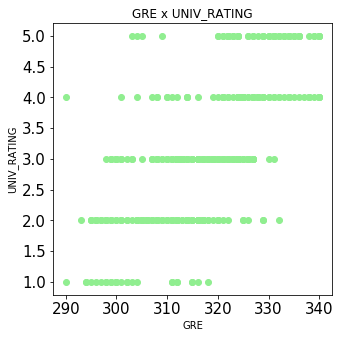

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
plt.scatter(grad_admissions.GRE_SCORE,grad_admissions.UNIV_RATING,color='lightgreen')
ax.set_xlabel('GRE')
ax.set_ylabel('UNIV_RATING')
ax.set_title('GRE x UNIV_RATING')
ax.tick_params(labelsize=15)

We can thus conclude from the above graphs that, highest the University Rating, the students have better GRE scores and CGPA

We can further plot CGPA vs GRE, GRE vs TOEFL, SOP vs UNIV_RATING , etc to understand the relation between these variables

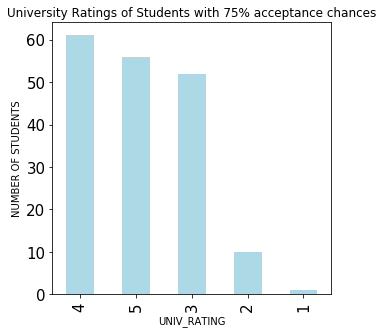

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
univ_ratings = grad_admissions[grad_admissions["CHANCE_OF_ADMIT"] >= 0.75]["UNIV_RATING"].value_counts().head(5)
univ_ratings.plot(kind='bar', color='lightblue')
ax.set_xlabel('UNIV_RATING')
ax.set_ylabel('NUMBER OF STUDENTS')
ax.set_title('University Ratings of Students with 75% acceptance chances')
ax.tick_params(labelsize=15)

From the above graph, it is implied that having graduated from 3, 4, 5 rated University, increases the chances of admit

### Pre-Processing Data for Model Fitting:

In [26]:
#Sampling the data
#we are splitting the datset into 80% training and 20% test subsets

grad_admissions = grad_admissions.sample(frac=0.20,random_state=0)
grad_admissions.shape

(80, 8)

In [27]:
#Independent and target variables

y = grad_admissions['CHANCE_OF_ADMIT']
X = grad_admissions.drop(['CHANCE_OF_ADMIT'], axis = 1)

In [58]:
#importing libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [29]:
import warnings
warnings.filterwarnings('ignore') 

In [30]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

In [31]:
#normalization
#This makes the values scaled to a fixed range 0-1

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

### Linear Regression

In [44]:
# create linear regression object 
reg = LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_) 
  
# variance score: 1 means perfect prediction 
print("Training set score: {:.3f}".format(reg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(reg.score(X_test, y_test)))

Coefficients: 
 [-0.10470194  0.22672584  0.02457633  0.04617477  0.06294044  0.27203678
  0.03511069]
Training set score: 0.824
Test set score: 0.311


We determine the accuracy through Variance score. The higher the accuracy score, the better the model fits the dataset

### Decision Tree Regression

In [56]:
tr = DecisionTreeRegressor(random_state=42)

tr.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tr.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: -0.430


### Random Forest Model

In [59]:
rf = RandomForestRegressor(random_state=42)

rf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.944
Accuracy on test set: 0.660


We can further apply SVC, Classifiers or Regression on considering fewer models in order to predict the Chances of Admit for a particular candidate.

#### From the above three regression models on 7 features, we can say that Random Forest shows better results on accuracy